In [1]:
%matplotlib inline
from pathlib import Path
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
# pip install mord
#from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
#Import math Library
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
DATA = Path('/Users/mgpel/anaconda3/Gwen/GWEN/ujse_a_1434342_sm1547')

<font size="5">Data Analysis-</font>
<font size="5">Column names and Shape of DATA</font>

In [3]:
sba_df = pd.read_csv(DATA / 'SBAcase.11.13.17.csv')
sba_df.columns

Index(['Selected', 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank',
       'BankState', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr',
       'GrAppv', 'SBA_Appv', 'New', 'RealEstate', 'Portion', 'Recession',
       'daysterm', 'xx', 'Default'],
      dtype='object')

In [4]:
#transpose data 
sba_df.T

,0,1,2,3,4,5,6,7,8,9,...,2092,2093,2094,2095,2096,2097,2098,2099,2100,2101
Selected,0,1,0,1,1,1,0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
LoanNr_ChkDgt,1004285007,1004535010,1005005006,1005535001,1005996006,1006295003,1015066002,1015266003,1018975003,1022515008,...,9831514008,9843254010,9847594004,9860074006,9893714004,9893874006,9901143004,9903293007,9925643006,9958873001
Name,SIMPLEX OFFICE SOLUTIONS,DREAM HOME REALTY,"Winset, Inc. dba Bankers Hill",Shiva Management,"GOLD CROWN HOME LOANS, INC",Ronald Lee Roberts,SUPERIOR BROKERS REALTY,LIBERTY REALTY CO,"SOUTHLAND MGT., CO.","AMR Appraisals, Inc.",...,DOS MONTES ENTERPRISES INC,INTEGRATED LENDING GROUP INC,WAITE REAL ESTATE GROUP INC,"CERNA GP,ELAN REAL ESTATE MGT'",HOLLYWOOD TENTWORKS INC,MEGA VIDEO & WIRELESS HIGHLAND,MOVING CONNECTION & CARL'S TRA,"A.J. STUDIO RENTALS, INC.",TAHOE MOTION PICTURE RENTALS,EFM ASSOCIATES
City,ANAHEIM,TORRANCE,SAN DIEGO,SAN DIEGO,LOS ANGELES,SACRAMENTO,HUNTINGTON PARK,LONG BEACH,SANTA ANA,SAN RAMON,...,MONTEBELLO,IRVINE,BONITA,SAN JOSE,PACOIMA,HIGHLAND,EL CAJON,CAMARILLO,SUN VALLEY,LOS ANGELES
State,CA,CA,CA,CA,CA,CA,CA,CA,CA,CA,...,CA,CA,CA,CA,CA,CA,CA,CA,CA,CA
Zip,92801,90505,92103,92108,91345,95831,90255,90808,92704,94583,...,90640,92618,91902,95112,91331,92346,92021,93012,91352,90068
Bank,CALIFORNIA BANK & TRUST,CALIFORNIA BANK & TRUST,CALIFORNIA BANK & TRUST,CALIFORNIA BANK & TRUST,SBA - EDF ENFORCEMENT ACTION,CALIFORNIA BANK & TRUST,U.S. BANK NATIONAL ASSOCIATION,JPMORGAN CHASE BANK NATL ASSOC,BANK OF AMERICA NATL ASSOC,BANK OF AMERICA NATL ASSOC,...,MUFG UNION BANK NATL ASSOC,WELLS FARGO BANK NATL ASSOC,JPMORGAN CHASE BANK NATL ASSOC,SBA - EDF ENFORCEMENT ACTION,SBA - EDF ENFORCEMENT ACTION,UNITI BANK,ZIONS FIRST NATIONAL BANK,CITY NATIONAL BANK,CITY NATIONAL BANK,WELLS FARGO BANK NATL ASSOC
BankState,CA,CA,CA,CA,CO,CA,OH,NV,NC,NC,...,CA,SD,NV,CO,CO,CA,UT,CA,CA,SD
NAICS,532420,531210,531210,531312,531390,531210,531210,531210,531390,531320,...,531210,531390,531210,531210,532310,532230,532120,532120,532120,531110
ApprovalDate,15074,15130,15188,15719,16840,15813,16841,16841,16252,16264,...,16833,16834,16834,16835,16838,16838,13530,13531,13542,13557


In [5]:
sba_df.shape

(2102, 35)

<font size="5">Paid in Full VS. Charged Off</font>

<AxesSubplot:xlabel='MIS_Status', ylabel='count'>

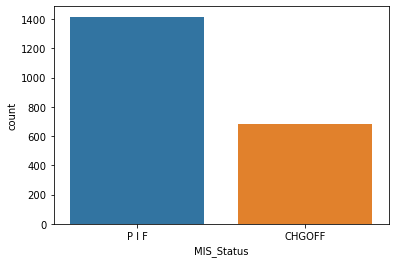

In [6]:
sns.countplot(x='MIS_Status',data=sba_df)

In [7]:
sba_df['MIS_Status'].value_counts()

P I F     1416
CHGOFF     686
Name: MIS_Status, dtype: int64

In [8]:
sba_df['MIS_Status'].value_counts()*100/len(sba_df)

P I F     67.364415
CHGOFF    32.635585
Name: MIS_Status, dtype: float64

<AxesSubplot:xlabel='DisbursementGross', ylabel='Count'>

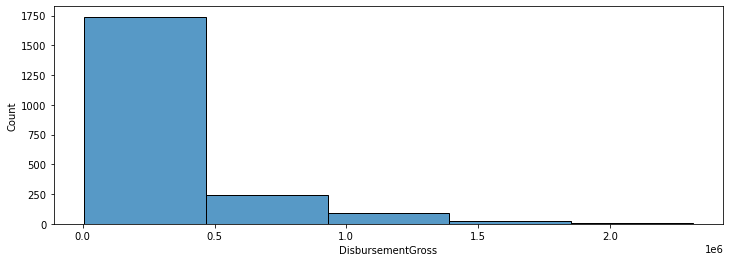

In [9]:
plt.figure(figsize=(12,4))
sns.histplot(sba_df['DisbursementGross'], bins=5)

<AxesSubplot:>

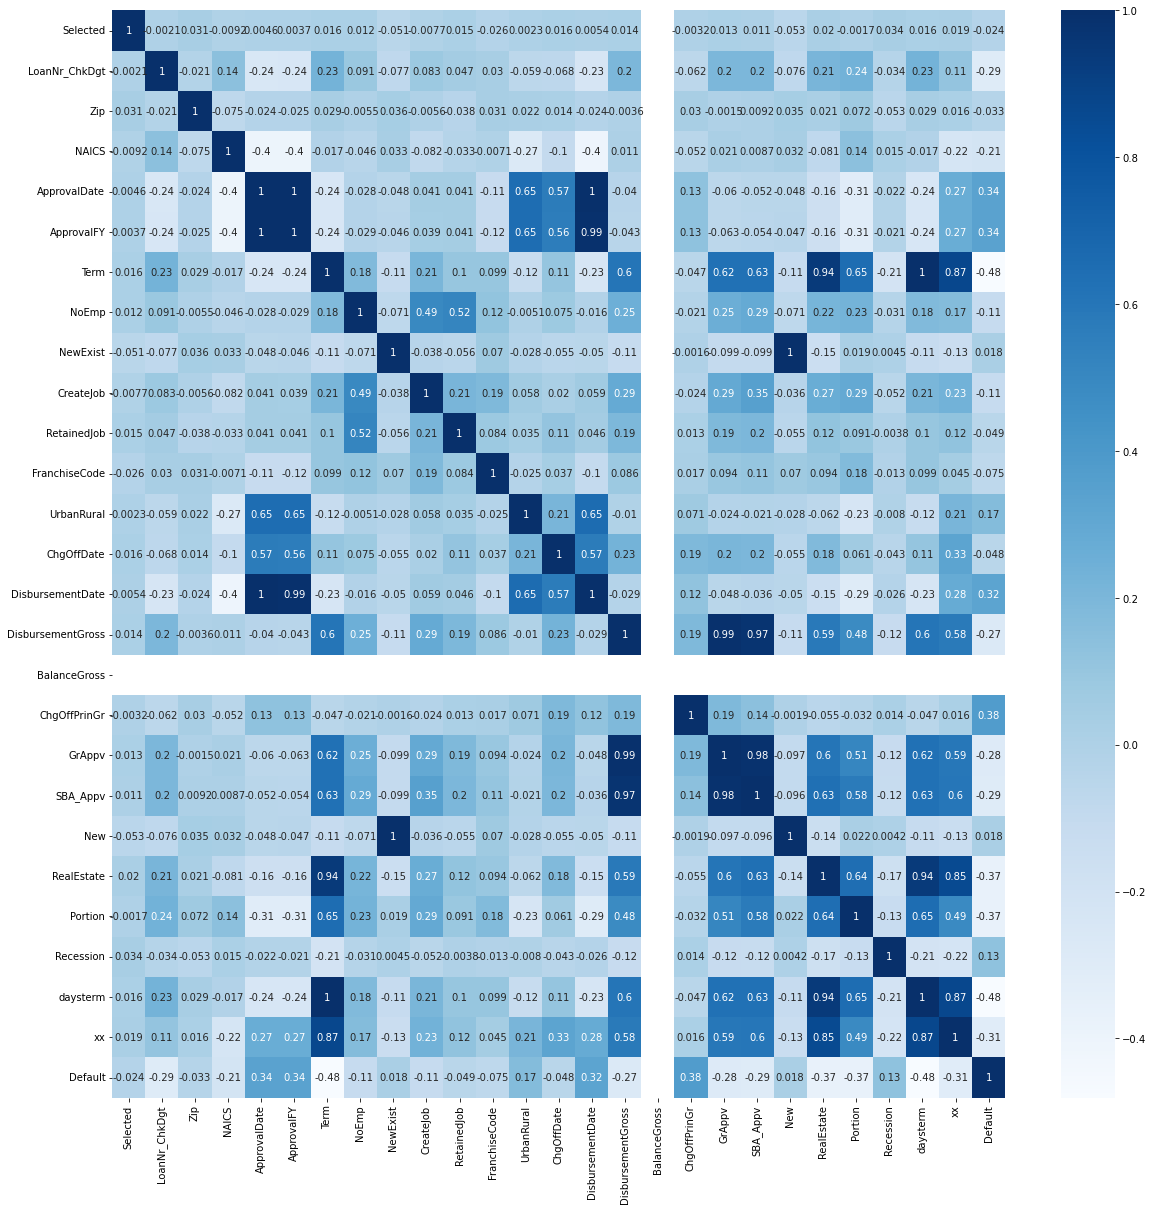

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(sba_df.corr(), annot=True, cmap='Blues')

<AxesSubplot:xlabel='Term', ylabel='DisbursementGross'>

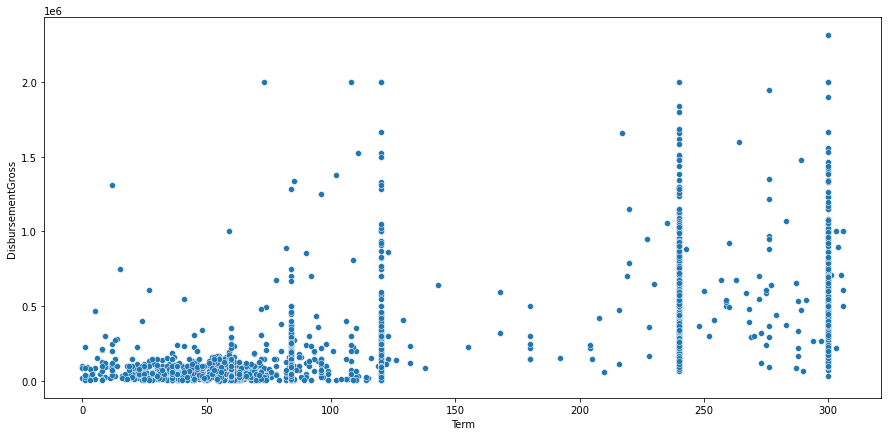

In [11]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'Term', y='DisbursementGross', data=sba_df)

<AxesSubplot:xlabel='MIS_Status', ylabel='DisbursementGross'>

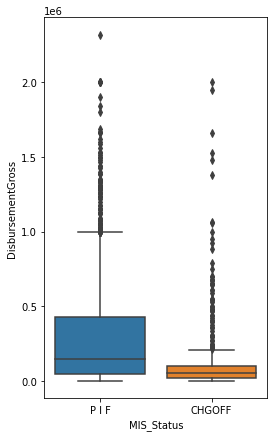

In [12]:
plt.figure(figsize=(4,7))
sns.boxplot(x='MIS_Status',y='DisbursementGross',data=sba_df)

In [13]:
sba_df.groupby('MIS_Status')['DisbursementGross'].describe()

,count,mean,std,min,25%,50%,75%,max
MIS_Status,,,,,,,,
CHGOFF,686.0,110938.854227,207139.000255,4835.0,25002.25,52400.0,100000.0,2000000.0
P I F,1416.0,306588.676554,369655.309824,5000.0,50000.00,150000.0,428250.0,2315000.0


In [14]:
sba_df['UrbanRural'].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:xlabel='UrbanRural', ylabel='count'>

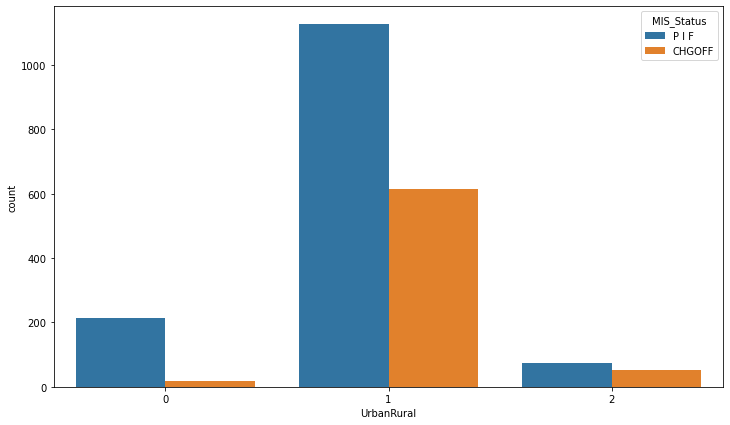

In [15]:
plt.figure(figsize=(12,7))
sns.countplot(x ='UrbanRural', hue='MIS_Status', data=sba_df)

In [16]:
# Grouping by 'MIS_Status' for records where 'UrbanRural' == '0'
sba_df[sba_df['UrbanRural'] == 0].groupby('MIS_Status')['UrbanRural'].value_counts()*100/len(sba_df[sba_df['UrbanRural'] == 0])

MIS_Status  UrbanRural
CHGOFF      0              7.725322
P I F       0             92.274678
Name: UrbanRural, dtype: float64

In [17]:
sba_df[sba_df['UrbanRural'] == 1].groupby('MIS_Status')['UrbanRural'].value_counts()*100/len(sba_df[sba_df['UrbanRural'] == 1])

MIS_Status  UrbanRural
CHGOFF      1             35.361653
P I F       1             64.638347
Name: UrbanRural, dtype: float64

In [18]:
sba_df[sba_df['UrbanRural'] == 2].groupby('MIS_Status')['UrbanRural'].value_counts()*100/len(sba_df[sba_df['UrbanRural'] == 2])

MIS_Status  UrbanRural
CHGOFF      2             40.944882
P I F       2             59.055118
Name: UrbanRural, dtype: float64

In [19]:
#sba_df['MIS_Status']=sba_df['MIS_Status'].apply(lambda x: 1 if x=='PIF' else 0)
#sba_df['MIS_Status']

In [20]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix
predictors = ['Recession', 'New', 'RealEstate', 'DisbursementGross', 'Portion']
outcome = 'Default'

train_df = sba_df[sba_df['Selected'] == 1]
test_df = sba_df[sba_df['Selected'] == 0]

train_X = train_df[predictors]
train_y = train_df[outcome]

test_X = test_df[predictors]
test_y = test_df[outcome]

train_X = sm.add_constant(train_X)
test_X = sm.add_constant(test_X)

logit_model = sm.Logit(train_y, train_X)
result = logit_model.fit()

print('Table 7A',result.summary())
print()
test_predictions = result.predict(test_X)

binary_predictions = (test_predictions >= 0.5).astype(int)

accuracy = accuracy_score(test_y, binary_predictions)

print(f'Accuracy: {accuracy:.2%}')
print()

confusion = confusion_matrix(test_y, binary_predictions)

print("Confusion Matrix:")
print(confusion)


Optimization terminated successfully.
         Current function value: 0.514605
         Iterations 7
Table 7A                            Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1051
Model:                          Logit   Df Residuals:                     1045
Method:                           MLE   Df Model:                            5
Date:                Tue, 15 Apr 2025   Pseudo R-squ.:                  0.1740
Time:                        20:54:44   Log-Likelihood:                -540.85
converged:                       True   LL-Null:                       -654.77
Covariance Type:            nonrobust   LLR p-value:                 3.112e-47
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.3537      0.323      4.192      0.000       0.721       1.987

In [21]:
filter_df = sba_df[['RealEstate','MIS_Status','Selected', 'Default']]
filter_df.head(15)

,RealEstate,MIS_Status,Selected,Default
0,0,P I F,0,0
1,0,P I F,1,0
2,0,P I F,0,0
3,0,P I F,1,0
4,1,P I F,1,0
5,0,P I F,1,0
6,1,CHGOFF,0,1
7,0,P I F,0,0
8,0,CHGOFF,0,1
9,0,P I F,1,0


In [22]:
predictors = ['RealEstate', 'Portion', 'Recession']
outcome = 'Default'

train_df = sba_df[sba_df['Selected'] == 1]
test_df = sba_df[sba_df['Selected'] == 0]

train_X = train_df[predictors]
train_y = train_df[outcome]

test_X = test_df[predictors]
test_y = test_df[outcome]

train_X = sm.add_constant(train_X)
test_X = sm.add_constant(test_X)

logit_model = sm.Logit(train_y, train_X)
result = logit_model.fit()

print('Table 8', result.summary())

test_predictions = result.predict(test_X)

binary_predictions = (test_predictions >= 0.5).astype(int)
accuracy = accuracy_score(test_y, binary_predictions)

print(f'Accuracy: {accuracy:.2%}')
print()

confusion = confusion_matrix(binary_predictions, test_y)

print("Confusion Matrix:")
print(confusion)

Optimization terminated successfully.
         Current function value: 0.515108
         Iterations 7
Table 8                            Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1051
Model:                          Logit   Df Residuals:                     1047
Method:                           MLE   Df Model:                            3
Date:                Tue, 15 Apr 2025   Pseudo R-squ.:                  0.1732
Time:                        20:54:44   Log-Likelihood:                -541.38
converged:                       True   LL-Null:                       -654.77
Covariance Type:            nonrobust   LLR p-value:                 6.874e-49
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3931      0.322      4.332      0.000       0.763       2.023
RealEstate    -2.1282

In [25]:
import pandas as pd
import numpy as np

# Original confusion matrix: rows = actual, columns = predicted
confusion_matrix = np.array([[682, 324],  # Actual Paid in Full
                             [14,  31]])  # Actual Charged Off

# Flip to show predicted "risk classification"
# We'll reorganize rows to be by prediction (risk category)
higher_risk_charged_off = confusion_matrix[1][1]  # Predicted 1, Actual 1
higher_risk_paid_full   = confusion_matrix[0][1]  # Predicted 1, Actual 0
lower_risk_charged_off  = confusion_matrix[1][0]  # Predicted 0, Actual 1
lower_risk_paid_full    = confusion_matrix[0][0]  # Predicted 0, Actual 0

# Create DataFrame in risk classification format
cm_data = {
    "Classification": [
        "Higher risk (more likely to be charged off)",
        "Lower risk (more likely to be paid in full)",
        "Total"
    ],
    "Loans charged off": [higher_risk_charged_off, lower_risk_charged_off, 355],
    "Loans paid in full": [higher_risk_paid_full, lower_risk_paid_full, 696],
    "Total": [45, 1006, 1051]
}
print('Table 9 California-based scenario: Classification of loans.')
cm_df = pd.DataFrame(cm_data)
cm_df


Table 9 California-based scenario: Classification of loans.


,Classification,Loans charged off,Loans paid in full,Total
0,Higher risk (more likely to be charged off),31,324,45
1,Lower risk (more likely to be paid in full),14,682,1006
2,Total,355,696,1051


In [26]:
import numpy as np

# Get coefficients from the model
coefficients = result.params

# Exponentiate coefficients to obtain odds ratios
odds_ratios = np.exp(coefficients)

# Print odds ratios
print('B.ii The odds as a function of the predictors')
for predictor, odds_ratio in zip(predictors, odds_ratios[1:]):  # Exclude intercept
    print(f"{predictor}: {odds_ratio}")


B.ii The odds as a function of the predictors
RealEstate: 0.11904937261109988
Portion: 0.050414217405951096
Recession: 1.6555329500604106


In [27]:
import pandas as pd
import statsmodels.api as sm

# Fit the GLM model
logit = sm.GLM(train_y, train_X, family=sm.families.Binomial())
result = logit.fit()

# Generate predictions
predictions = result.predict(test_X)

# Convert probabilities to binary predictions
predictions_nominal = [0 if x < 0.5 else 1 for x in predictions]

# Create DataFrame to store results
logit_result = pd.DataFrame({
    'actual': test_y,  # Actual values
    'p(0)': 1 - predictions,  # Probability of class 0
    'p(1)': predictions,       # Probability of class 1
    'predicted': predictions_nominal  # Predicted classes
})

# Print the DataFrame
print('8.iii The probability as a function of the predictors')
print()
print(logit_result)


8.iii The probability as a function of the predictors

      actual      p(0)      p(1)  predicted
0          0  0.525148  0.474852          0
2          0  0.525148  0.474852          0
6          1  0.951467  0.048533          0
7          0  0.525148  0.474852          0
8          1  0.525148  0.474852          0
...      ...       ...       ...        ...
2094       0  0.525148  0.474852          0
2095       0  0.976400  0.023600          0
2096       0  0.976400  0.023600          0
2099       0  0.730453  0.269547          0
2101       0  0.525148  0.474852          0

[1051 rows x 4 columns]


In [28]:
import numpy as np

# Coefficient for the predictor variable indicating real estate backing
beta_real_estate = -2.1282

# Exponentiate coefficient to obtain odds ratio
odds_ratio_real_estate = np.exp(beta_real_estate)

# Print the odds ratio
print(f'D.i Odds Loan backed by real estate  {odds_ratio_real_estate:.2%}')

# Interpretation
if odds_ratio_real_estate > 1:
    print("Loans backed by real estate likely to default.")
elif odds_ratio_real_estate < 1:
    print("\nLoans backed by real estate less likely to default.")
else:
    print("\nLoans backed by real estate have equal odds of defaulting compared to those not backed by real estate.")


D.i Odds Loan backed by real estate  11.91%

Loans backed by real estate less likely to default.


In [32]:
import numpy as np

# Coefficient for RealEstate variable
recession_coefficient = 0.5041

# Calculate the odds ratio
odds_ratio = np.exp(recession_coefficient)

# Calculate the percentage decrease in likelihood of default
percentage_decrease = (1 - odds_ratio) * 100

print(f'Odds ratio:  {odds_ratio:.4f}')
print(f'\nPercentage decrease in likelihood of default: {percentage_decrease:.2f}%')

Odds ratio:  1.6555

Percentage decrease in likelihood of default: -65.55%


In [33]:
import numpy as np

# Coefficient for RealEstate variable
portion = -2.9875

# Calculate the odds ratio
odds_ratio = np.exp(portion)

# Calculate the percentage decrease in likelihood of default
percentage_decrease = (1 - odds_ratio) * 100

print(f'Odds ratio:  {odds_ratio:.4f}')
print(f'\nPercentage decrease in likelihood of default: {percentage_decrease:.2f}%')

Odds ratio:  0.0504

Percentage decrease in likelihood of default: 94.96%


In [34]:
import numpy as np

# Define the array with the data points
Carmichael = np.array([[1, .75, 1, 0.05]])



# Assuming you have the coefficients for your Table 8 model
coefficients = [1.6045, -2.103, -3.267, 0.472]

# Calculating the linear combination of predictors and coefficients
linear_combination = np.dot(Carmichael, coefficients)

# Applying the logistic function to the linear combination
probability = 1 / (1 + np.exp(-linear_combination))

# Making predictions based on the threshold of 0.5
prediction = 'High Risk: Deny' if probability >= 0.5 else 'Low Risk: Approve'

print("Carmichael Probability:", probability)
print("Prediction:", prediction)


Carmichael Probability: [0.03856247]
Prediction: Low Risk: Approve


In [35]:
import numpy as np

# Define the array with the data points
SV = np.array([[1, .04, 0, 0.55]])



# Assuming you have the coefficients for your Table 8 model
coefficients = [1.6045, -2.103, -3.267, 0.472]

# Calculating the linear combination of predictors and coefficients
linear_combination = np.dot(SV, coefficients)

# Applying the logistic function to the linear combination
probability = 1 / (1 + np.exp(-linear_combination))

# Making predictions based on the threshold of 0.5
prediction = 'High Risk: Deny' if probability >= 0.5 else 'Low Risk: Approve'

print(f'SV Consuting Probability: {probability}')
print(f'Prediction: {prediction}')

SV Consuting Probability: [0.8556944]
Prediction: High Risk: Deny


In [36]:
import numpy as np

# Threshold based on Odds
threshold_odds = 1  # Let's assume we want odds of 2:1 for approval
threshold_prob_odds = threshold_odds / (1 + threshold_odds)
print(f'Threshold Probability based on Odds: {threshold_prob_odds:4f}')

Threshold Probability based on Odds: 0.500000


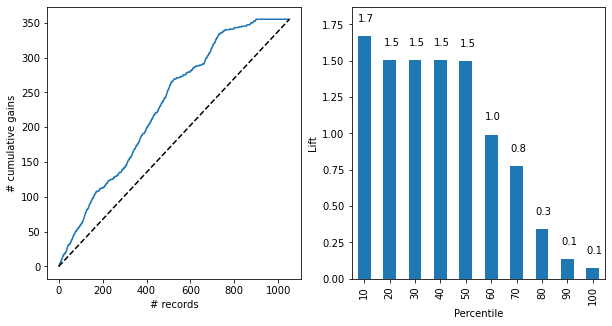

In [37]:
import numpy as np
import matplotlib.pyplot as plt

df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
plt.show()

In [40]:
new= sba_df[['RealEstate', 'MIS_Status']]  # Using indexing
N9= new.loc[sba_df['Selected'] == 1]
N9.value_counts()

RealEstate  MIS_Status
0           P I F         433
            CHGOFF        320
1           P I F         287
            CHGOFF         11
dtype: int64

In [41]:
predictors = ['New', 'RealEstate', 'DisbursementGross', 'Portion', 'Recession']
outcome = 'Default'
X = pd.get_dummies(train_df[predictors], drop_first=True, dtype=int)
y = train_df[outcome]

# split into training and validation
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, 
                                                      random_state=1)

logit_full = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_full.fit(train_X, train_y)

pd.set_option('display.width', 95)
pd.set_option('display.precision',3)
pd.set_option('display.max_columns', 33)
print('H-Table 7A  sklearn LogisticRegression() liblinear solver')
print(f'Intercept : {logit_full.intercept_[0]:.4f}')

print(pd.DataFrame({'coeff': logit_full.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_full.predict(valid_X), df=len(train_X.columns) + 1))
pd.reset_option('display.width')
pd.reset_option('display.precision')
pd.reset_option('display.max_columns')

H-Table 7A  sklearn LogisticRegression() liblinear solver
Intercept : -0.0000
             New  RealEstate  DisbursementGross    Portion  Recession
coeff -4.689e-12  -2.074e-11         -3.443e-06 -1.859e-11  4.102e-12

AIC 704.2005853771188


In [42]:
predictors = ['RealEstate', 'Portion', 'Recession']
outcome = 'Default'
X = pd.get_dummies(train_df[predictors], drop_first=True, dtype=int)
y = train_df[outcome]

# split into training and validation
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, 
                                                      random_state=1)

logit_full = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_full.fit(train_X, train_y)

pd.set_option('display.width', 95)
pd.set_option('display.precision',3)
pd.set_option('display.max_columns', 33)
print('H-Table 8  sklearn LogisticRegression() liblinear solver')
print(f'Intercept : {logit_full.intercept_[0]:.4f}')

print(pd.DataFrame({'coeff': logit_full.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_full.predict(valid_X), df=len(train_X.columns) + 1))
pd.reset_option('display.width')
pd.reset_option('display.precision')
pd.reset_option('display.max_columns')

H-Table 8  sklearn LogisticRegression() liblinear solver
Intercept : 1.6042
       RealEstate  Portion  Recession
coeff      -2.103   -3.267      0.472

AIC 669.2560488780967
